# CMPT 423/820 
## Assignment 2 Question 1
* Seyedeh Mina Mousavifar
* 11279515
* sem311

In [3]:
import pandas as pd

# reading iris dataset and adding header
iris = pd.read_csv('data/iris.csv', 
                   header=None, 
                   names=['sepal_length', 'sepal_width', 
                          'petal_length', 'petal_width', 'species'])

### Part 1. 

Build the four 1-feature classifiers, and calculate the accuracy of each.

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

KFOLDS = 10

def nb_classifier(data_in, label_in):
    """
    :purpose: This function creates an NB classifier and calculates 
    its cross validated accuracy
    :param data_in: dataset
    :param label_in: true answers for the dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    clf_nb = GaussianNB()
    
    # fitting the model to the data
    clf_nb.fit(data_in, label_in) 
    
    result = cross_val_score(clf_nb, data_in, 
                    label_in, 
                    cv=KFOLDS, 
                    scoring='accuracy')
    
    return round(result.mean(),5)


# creating answer
model_info = {'sepal_length':{'acc':0}, 'sepal_width':{'acc':0}, 
                          'petal_length':{'acc':0}, 'petal_width':{'acc':0},
                         'all_feature':{'acc':0}}

# separating labels
labels = iris.values[:, 4]

# Classifier for sepal length
split_data = iris.values[:, 0]
model_info['sepal_length']['acc'] = nb_classifier(split_data.reshape(-1, 1), 
                                                                       labels)

# Classifier for sepal width
split_data = iris.values[:, 1]
model_info['sepal_width']['acc'] = nb_classifier(split_data.reshape(-1, 1), 
                                                                      labels)

# Classifier for petal length
split_data = iris.values[:, 2]
model_info['petal_length']['acc'] = nb_classifier(split_data.reshape(-1, 1), 
                                                                       labels)

# Classifier for petal width
split_data = iris.values[:, 3]
model_info['petal_width']['acc'] = nb_classifier(split_data.reshape(-1, 1), 
                                                                      labels)

# printing result in tabular format
print('\033[1m' + 'Naive Bayes classifier for 1 feature' + '\033[0m')
print('{:<15} {:<15}'.format('feature','accuracy'))
for feature, item in model_info.items():
    print('{:<15} {:<15}'.format(feature, item['acc']))

Naive Bayes classifier for 1 feature
feature         accuracy       
sepal_length    0.72667        
sepal_width     0.56           
petal_length    0.95333        
petal_width     0.95333        
all_feature     0              


### Part 2. 

Build the 4-feature classifier (as we saw in class), and calculate the accuracy.

In [10]:
# Classifier for all features
split_data = iris.values[:, :4]
model_info['all_feature']['acc'] = nb_classifier(split_data, labels)

print('\033[1m' + 'Naive Bayes classifier for 4 features' + '\033[0m')

print('Accuracy {:<15}'.format(model_info['all_feature']['acc']))

Naive Bayes classifier for 4 features
Accuracy 0.95333        


### Part 3. 

Reproduce the density plots from A1Q7 Task 4 that shows the class density for each feature, and compare the density plots to the accuracy scores you obtained. In a few sentences discuss how the density plot relates to the accuracy score.

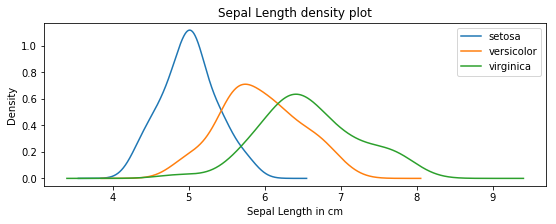

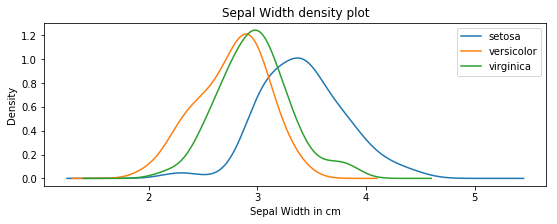

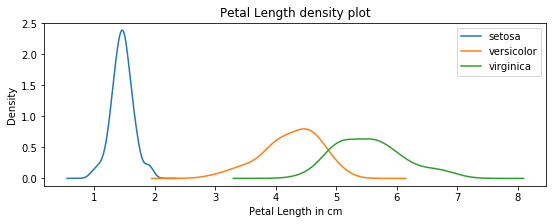

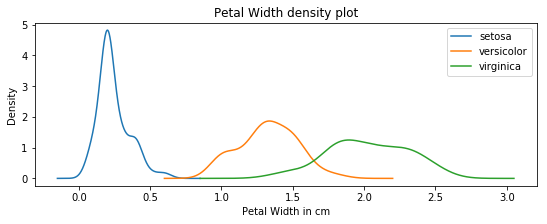

In [11]:
import matplotlib.pyplot as plt

# Sepal length
# select only sepal_length and sepcies columns
sepal = iris.filter(items=['sepal_length', 'species'])

# creating plot
fig, ax = plt.subplots(figsize=(9, 3))

# adding each group to the plot
for label, df in sepal.groupby('species'):
    df.sepal_length.plot(kind="kde", ax=ax, label=label)

# adding plot axis label, title and legend
plt.title('Sepal Length density plot')
plt.xlabel('Sepal Length in cm')
plot = plt.legend()

# Sepal width
# select only sepal_width and sepcies columns
sepal = iris.filter(items=['sepal_width', 'species'])

fig, ax = plt.subplots(figsize=(9, 3))
for label, df in sepal.groupby('species'):
    df.sepal_width.plot(kind="kde", ax=ax, label=label)


plt.title('Sepal Width density plot')
plt.xlabel('Sepal Width in cm')
plot = plt.legend()

# Petal length
# select only petal_length and sepcies columns
sepal = iris.filter(items=['petal_length', 'species'])

fig, ax = plt.subplots(figsize=(9, 3))
for label, df in sepal.groupby('species'):
    df.petal_length.plot(kind="kde", ax=ax, label=label)


plt.title('Petal Length density plot')
plt.xlabel('Petal Length in cm')
plot = plt.legend()

# Petal width
# select only petal_width and sepcies columns
sepal = iris.filter(items=['petal_width', 'species'])

fig, ax = plt.subplots(figsize=(9, 3))
for label, df in sepal.groupby('species'):
    df.petal_width.plot(kind="kde", ax=ax, label=label)


plt.title('Petal Width density plot')
plt.xlabel('Petal Width in cm')
plt.legend()

plt.show()

In [12]:
# printing result in tabular format
print('\033[1m' + 'Naive Bayes classifier for 1 feature' + '\033[0m')
print('{:<15} {:<15}'.format('feature','accuracy'))
for feature, item in model_info.items():
    print('{:<15} {:<15}'.format(feature, item['acc']))

Naive Bayes classifier for 1 feature
feature         accuracy       
sepal_length    0.72667        
sepal_width     0.56           
petal_length    0.95333        
petal_width     0.95333        
all_feature     0.95333        


> In the plots above, the less the curves for different species in the plots interfere with each other, the better our Naive Bayes classifier gets. We can see that *sepal width* has the worst accuracy, and its curves have the most overlap with each other.

### Part 4.
Compare the best 1-feature classifier to the 4-feature classifier, in terms of accuracy. Discuss briefly your results.

In [13]:
# printing result in tabular format
print('\033[1m' + 'Naive Bayes classifier' + '\033[0m')
print('{:<15} {:<15}'.format('feature','accuracy'))
for feature, item in model_info.items():
    print('{:<15} {:<15}'.format(feature, item['acc']))

Naive Bayes classifier
feature         accuracy       
sepal_length    0.72667        
sepal_width     0.56           
petal_length    0.95333        
petal_width     0.95333        
all_feature     0.95333        


> The classifier for *Petal width* has the most accuracy between all features and *Sepat width* has the worst. We can see that 1-feature classifier based on *Petal width* and 4-feature classifier have the same accuracy, so the other features don't enhance our classifier, and we might omit them from our model. However, we should take into account that these are the accuracy on the training set.